In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

%matplotlib inline

In [2]:
# Pandas setting
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load necessary data files for analize
sellers = pd.read_csv('sellers_1.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [4]:
# Просмотр размерностей данных
sellers.shape, order_items.shape, orders.shape, products.shape

((3095, 4), (112650, 7), (99441, 8), (32951, 9))

In [5]:
# Объединение всех данных в единую таблицу
data_sellers_and_orders = pd.merge(sellers, order_items, how='left', on='seller_id')
full_data = pd.merge(data_sellers_and_orders, orders, how='left', on='order_id')
full_data = pd.merge(full_data, products, how='left', on='product_id')

In [6]:
full_data.shape

(112650, 25)

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_zip_code_prefix         112650 non-null  int64  
 2   seller_city                    112650 non-null  object 
 3   seller_state                   112650 non-null  object 
 4   order_id                       112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   shipping_limit_date            112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

Присутствуют пропуски значений

In [8]:
full_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,9facbfd2dd51a45404d58154b12ed2dd,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,malas_acessorios,21.0,769.0,4.0,1600.0,55.0,37.0,30.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,4e2c1f15de98416a90c2ee06b55ccc9b,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03 00:00:00,papelaria,30.0,832.0,5.0,2000.0,25.0,55.0,40.0


In [9]:
full_data.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [10]:
# Фильтр ненужных колонок
non_value_columns = ['product_name_lenght',
                        'product_description_lenght',
                        'product_photos_qty', 
                        'product_weight_g', 
                        'product_length_cm',
                        'product_height_cm', 
                        'product_width_cm',
                        'seller_zip_code_prefix',
                        'customer_id',
                        ]
full_data = full_data.drop(non_value_columns, axis=1)

In [11]:
full_data.describe().round(2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


In [12]:
full_data.columns

Index(['seller_id', 'seller_city', 'seller_state', 'order_id', 'order_item_id',
       'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name'],
      dtype='object')

In [13]:
# В одном заказе могут быть несколько продуктов. Просмотр одного из таких заказов
# Видно, что в 1 заказе с несколькоми товарами продавцы могут быть разные
full_data[full_data['order_id'] == 'bc8a5de6abf5b14f98a6135a7fb46731']

,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,esporte_lazer
88524,8c16d1f32a54d92897cc437244442e1b,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.9,26.68,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,moveis_escritorio


In [14]:
# rearrange all the columns for easy reference
df_sellers_analize = full_data[['seller_id', 
                                'seller_city', 
                                'seller_state', 
                                'product_category_name',
                                'price', 'order_status', 
                                'freight_value', 
                                'order_delivered_customer_date', 
                                'order_id',
                                'order_item_id',
                                'product_id']]

In [15]:
df_sellers_analize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_city                    112650 non-null  object 
 2   seller_state                   112650 non-null  object 
 3   product_category_name          111047 non-null  object 
 4   price                          112650 non-null  float64
 5   order_status                   112650 non-null  object 
 6   freight_value                  112650 non-null  float64
 7   order_delivered_customer_date  110196 non-null  object 
 8   order_id                       112650 non-null  object 
 9   order_item_id                  112650 non-null  int64  
 10  product_id                     112650 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.3+ MB


In [16]:
# Просмотр уникальных значений городов. Нужно чистить данные
df_sellers_analize['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

In [17]:
# Просмотр уникальных значений районов продавцов
df_sellers_analize['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

In [18]:
# check missing values for each column 
df_sellers_analize.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2454
product_category_name            1603
seller_id                           0
seller_city                         0
seller_state                        0
price                               0
order_status                        0
freight_value                       0
order_id                            0
order_item_id                       0
product_id                          0
dtype: int64

### Cleaning data

In [19]:
# clean seller_city from wrong characters
df_sellers_analize['seller_city'] = df_sellers_analize['seller_city'].str.split(r'\\|,|/|\(|\-').str[0].str.strip()

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# collect only delivered, shipped and invoiced orders
df_sellers_analize = df_sellers_analize[df_sellers_analize['order_status'].isin(['delivered', 'shipped', 'invoiced'])]

In [21]:
# Очистка от дубиликатов строк и пустых значений 
df_sellers_analize = df_sellers_analize.drop_duplicates()
df_sellers_analize = df_sellers_analize.dropna().reset_index(drop=True)

In [22]:
df_sellers_analize.shape

(108652, 11)

In [23]:
df_sellers_analize.columns

Index(['seller_id', 'seller_city', 'seller_state', 'product_category_name',
       'price', 'order_status', 'freight_value',
       'order_delivered_customer_date', 'order_id', 'order_item_id',
       'product_id'],
      dtype='object')

In [24]:
# check missing values for each column 
df_sellers_analize.isnull().sum().sort_values(ascending=False)

seller_id                        0
seller_city                      0
seller_state                     0
product_category_name            0
price                            0
order_status                     0
freight_value                    0
order_delivered_customer_date    0
order_id                         0
order_item_id                    0
product_id                       0
dtype: int64

### Best | worst sellers analize

#### Первоначальный анализ продавцов по количеству продаж

In [25]:
orders_count = df_sellers_analize.groupby('seller_id', as_index=False)['order_id'].count()

In [26]:
orders_count.head()

,seller_id,order_id
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,234
2,002100f778ceb8431b7a1020ff7ab48f,54
3,004c9cd9d87a3c30c522c48c4fc07416,156
4,00720abe85ba0859807595bbf045a33b,26


In [27]:
# Сортировка значений
orders_count = orders_count.rename(columns={'order_id': 'num_orders'}). \
    sort_values(by=['num_orders'], ascending=False, ignore_index=True)

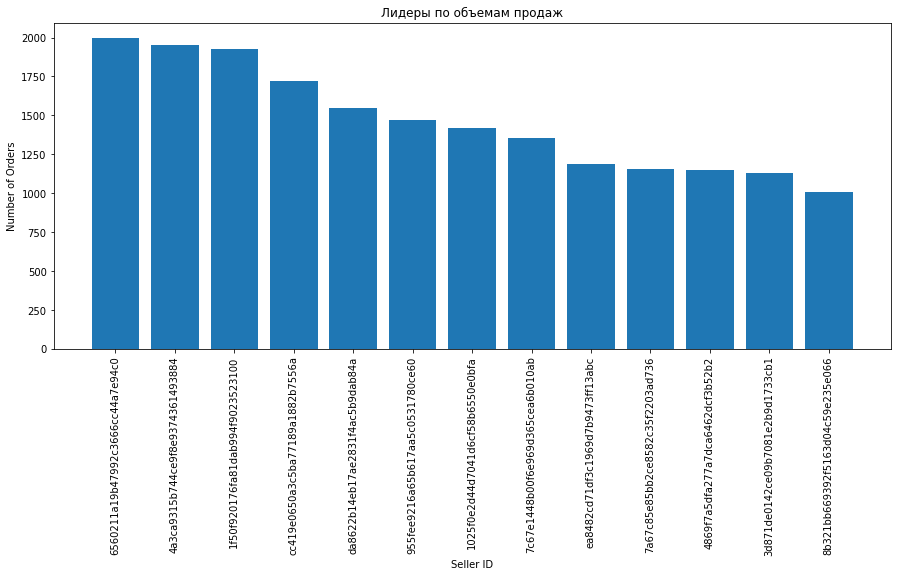

In [28]:
# График лидеров продаж по количеству
plt.subplots(figsize=(15, 6))
plt.bar(orders_count[orders_count['num_orders'] > 1000]['seller_id'],
        orders_count[orders_count['num_orders'] > 1000]['num_orders'])
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.title('Лидеры по объемам продаж')
plt.show()

In [29]:
orders_count.head()

,seller_id,num_orders
0,6560211a19b47992c3666cc44a7e94c0,1996
1,4a3ca9315b744ce9f8e9374361493884,1949
2,1f50f920176fa81dab994f9023523100,1926
3,cc419e0650a3c5ba77189a1882b7556a,1719
4,da8622b14eb17ae2831f4ac5b9dab84a,1548


In [30]:
# Собираем топ5 и топ10 продавцов
top5_sellers = orders_count.iloc[:5, 0].tolist()
top10_sellers = orders_count.iloc[:10, 0].tolist()

In [31]:
orders_count[orders_count['num_orders'] > 1000].shape[0]

13

In [32]:
# plt.subplots(figsize=(15,6))
# plt.plot(orders_count['seller_id'], orders_count['num_orders'])
# plt.xlabel('Customers ID')
# plt.xticks(rotation=90)
# plt.ylabel('Number of Orders')
# plt.title('Number of Orders for different Customers')
# plt.show()

#### Полезно посмотреть не по количеству продаж, а по доходу

In [33]:
sellers_income = df_sellers_analize.groupby('seller_id', as_index=False)['price'].sum(). \
                rename(columns={'price': 'sum_income'}). \
                sort_values(by=['sum_income'], ascending=False, ignore_index=True)

In [34]:
sellers_income.head(25)

,seller_id,sum_income
0,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93
1,53243585a1d6dc2643021fd1853d8905,217940.44
2,4a3ca9315b744ce9f8e9374361493884,196882.12
3,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
4,7c67e1448b00f6e969d365cea6b010ab,186570.05
5,7e93a43ef30c4f03f38b393420bc753a,165981.49
6,da8622b14eb17ae2831f4ac5b9dab84a,159816.87
7,7a67c85e85bb2ce8582c35f2203ad736,139658.69
8,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56
9,955fee9216a65b617aa5c0531780ce60,131836.71


In [35]:
(sellers_income['sum_income'] < 100).sum()

371

In [36]:
top5_best_sellers = sellers_income.iloc[:5, 0].tolist()
top10_best_sellers = sellers_income.iloc[:10, 0].tolist()

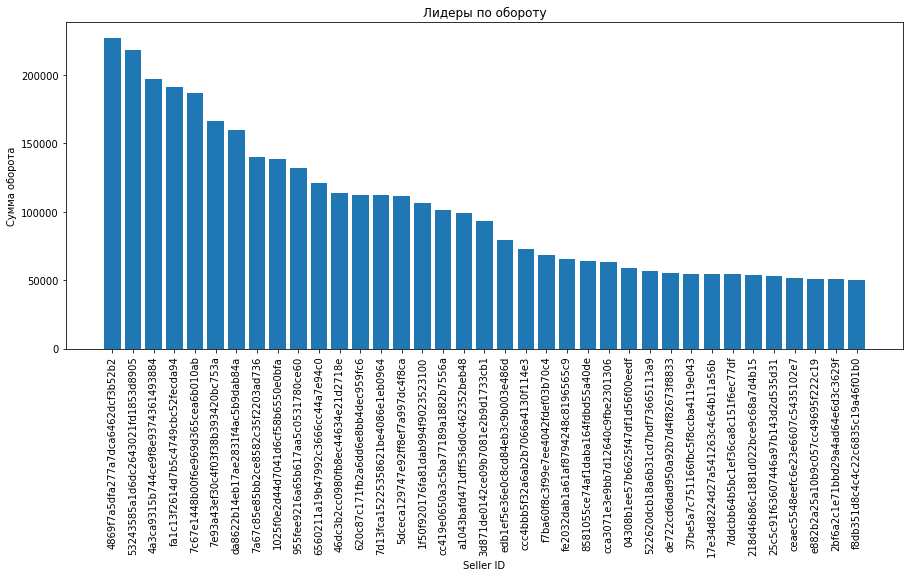

In [37]:
plt.subplots(figsize=(15, 6))
plt.bar(sellers_income[sellers_income['sum_income'] > 50000]['seller_id'],
        sellers_income[sellers_income['sum_income'] > 50000]['sum_income'])
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
plt.ylabel('Сумма оборота')
plt.title('Лидеры по обороту')
plt.show()

#### Продавцы, которые продали товаров меньше 100 товаров

In [38]:
orders_count[orders_count['num_orders'] < 100].shape

(2682, 2)

In [39]:
orders_count[orders_count['num_orders'] == 1].shape

(488, 2)

In [40]:
outsider_sellers = orders_count[orders_count['num_orders'] < 100].reset_index(drop=True)

In [41]:
outsider_sellers.head()

,seller_id,num_orders
0,dbd66278cbfe1aa1000f90a217ca4695,99
1,9d4db00d65d7760644ac0c14edb5fd86,99
2,688756f717c462a206ad854c5027a64a,99
3,70c27847eca8195c983ed7e798c56743,98
4,f27e33c6d29b5138fa9967bcd445b6d5,98


In [42]:
count_outsider_sellers_by_orders = outsider_sellers.groupby('num_orders'). \
    count().reset_index().rename(columns={'seller_id': 'num_sellers'})

In [43]:
count_outsider_sellers_by_orders.shape

(99, 2)

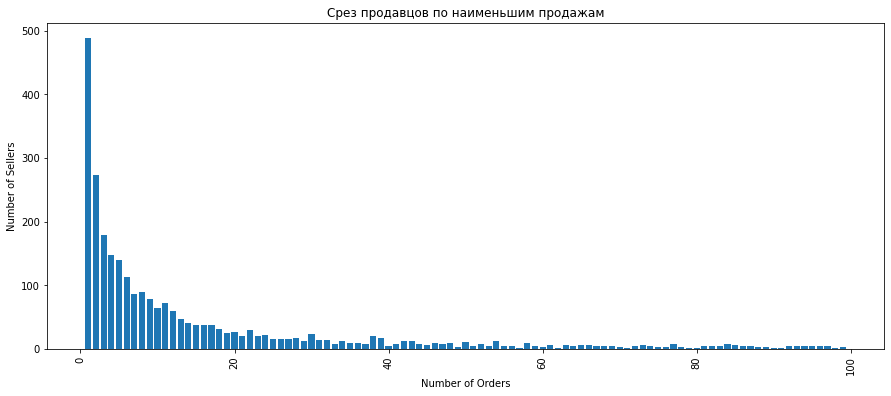

In [44]:
plt.subplots(figsize=(15, 6))
plt.bar(count_outsider_sellers_by_orders['num_orders'],
        count_outsider_sellers_by_orders['num_sellers'])
plt.xlabel('Number of Orders')
plt.xticks(rotation=90)
plt.ylabel('Number of Sellers')
plt.title('Срез продавцов по наименьшим продажам')
plt.show()

Интересно увидеть диаграмму доходов топ 5 продавцов, в разрезе категорий (с) Заказчик

In [45]:
df_sellers_analize.head(10)

,seller_id,seller_city,seller_state,product_category_name,price,order_status,freight_value,order_delivered_customer_date,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,esporte_lazer,106.20,delivered,9.56,2017-08-30 16:07:13,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61
1,3442f8959a84dea7ee197c632cb2df15,campinas,SP,esporte_lazer,101.70,delivered,15.92,2017-06-02 16:57:44,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,esporte_lazer,10.80,delivered,2.42,2017-09-01 16:51:26,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,malas_acessorios,89.99,delivered,45.09,2017-11-21 23:26:35,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,papelaria,199.90,delivered,21.89,2017-10-06 17:03:59,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f
5,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,malas_acessorios,99.90,delivered,22.70,2017-06-27 16:18:39,06e4e324b83309e575442446e34377d7,1,1c36a5285f7f3b1ed2637d7c528ce5ff
6,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,papelaria,199.99,delivered,13.10,2017-12-05 18:04:43,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af
7,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,malas_acessorios,209.90,delivered,21.55,2017-05-09 14:27:05,1887b26eba419ce20f6fe34a6f88e80a,1,765c417cdc38443aaa558a0159a98591
8,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,malas_acessorios,289.99,delivered,98.02,2017-09-19 21:27:01,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb
9,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,papelaria,199.99,delivered,13.10,2017-12-07 21:53:18,2d5abff139e8101029312b689bfeae7a,1,f74ed500ab93d12ce3fbc611474d89af


### Группировка топ 5 продавцов по количеству продаж в разрезе категорий 

In [46]:
sellers_by_category = df_sellers_analize.groupby(['seller_id', 'product_category_name'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

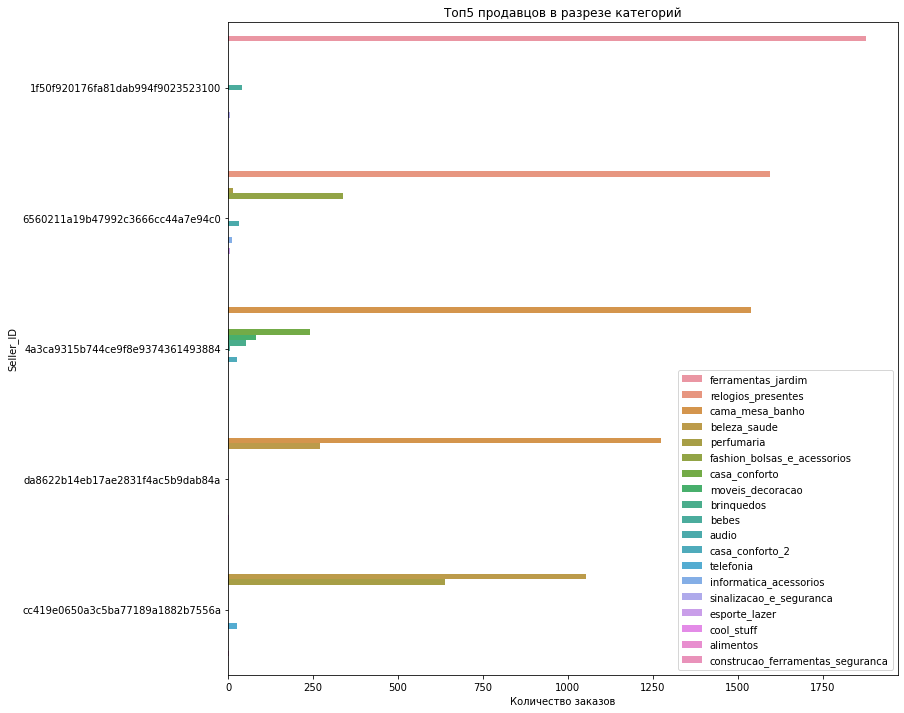

In [47]:
plt.subplots(figsize=(12, 12))
sns.barplot(y='seller_id', x='num_orders', hue='product_category_name', 
            data=sellers_by_category[sellers_by_category['seller_id'].isin(top5_sellers)])
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Количество заказов')
plt.title('Топ5 продавцов в разрезе категорий')
plt.legend(loc=4)
plt.show()
# sellers_by_category

Пока неинформативно!

### Посчитаем сумму доходов топ продавцов по категориям

In [48]:
sellers_income_by_category = df_sellers_analize.groupby(['seller_id', 'product_category_name'], as_index=False)['price'].sum(). \
                reset_index(drop=True). \
                rename(columns={'price': 'sum_income'}). \
                sort_values(by=['sum_income'], ascending=False, ignore_index=True)

In [49]:
sellers_income_by_category

,seller_id,product_category_name,sum_income
0,4869f7a5dfa277a7dca6462dcf3b52b2,relogios_presentes,198822.03
1,fa1c13f2614d7b5c4749cbc52fecda94,relogios_presentes,188967.85
2,7c67e1448b00f6e969d365cea6b010ab,moveis_escritorio,171605.82
3,53243585a1d6dc2643021fd1853d8905,pcs,163322.76
4,4a3ca9315b744ce9f8e9374361493884,cama_mesa_banho,162206.95
...,...,...,...
6146,77128dec4bec4878c37ab7d6169d6f26,alimentos_bebidas,6.50
6147,741f8c587cb4248ebc5b779a0e8e0e51,pet_shop,5.99
6148,f593898ec748b7a8cb81fc04edafd98a,artes,5.35
6149,a218df5c097b0ca409cfaac1488cc7f6,construcao_ferramentas_construcao,3.99


In [50]:
sellers_income_by_category.to_csv('sellers_income_by_category.csv')

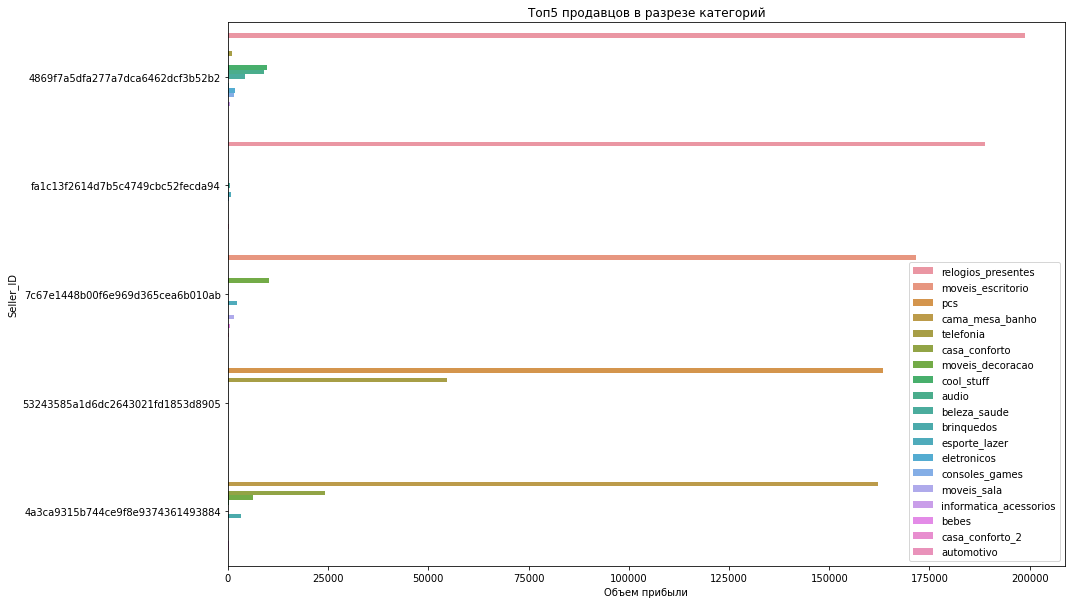

In [51]:
plt.subplots(figsize=(15, 10))
sns.barplot(y='seller_id', x='sum_income', hue='product_category_name', 
            data=sellers_income_by_category[sellers_income_by_category['seller_id'].isin(top5_best_sellers)])
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Объем прибыли')
plt.title('Топ5 продавцов в разрезе категорий')
plt.legend(loc=4)
plt.show()

Анализ топ 10 городов по продажам, в котором смотрим на топ10 продавцов

In [52]:
best_cities_by_orders = df_sellers_analize.groupby(['seller_city'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [53]:
top10_cities = best_cities_by_orders.iloc[:10, 0].tolist()

In [54]:
city_by_cellers = df_sellers_analize.groupby(['seller_city', 'seller_id'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [55]:
city_by_cellers = city_by_cellers[city_by_cellers['seller_city'].isin(top10_cities)].reset_index(drop=True)

In [56]:
best_cities_and_cellers = city_by_cellers[city_by_cellers['seller_id'].isin(top10_sellers)]

In [57]:
best_cities_and_cellers.head()

,seller_city,seller_id,num_orders
0,sao paulo,6560211a19b47992c3666cc44a7e94c0,1996
1,ibitinga,4a3ca9315b744ce9f8e9374361493884,1949
2,sao jose do rio preto,1f50f920176fa81dab994f9023523100,1926
3,santo andre,cc419e0650a3c5ba77189a1882b7556a,1719
4,sao paulo,955fee9216a65b617aa5c0531780ce60,1472


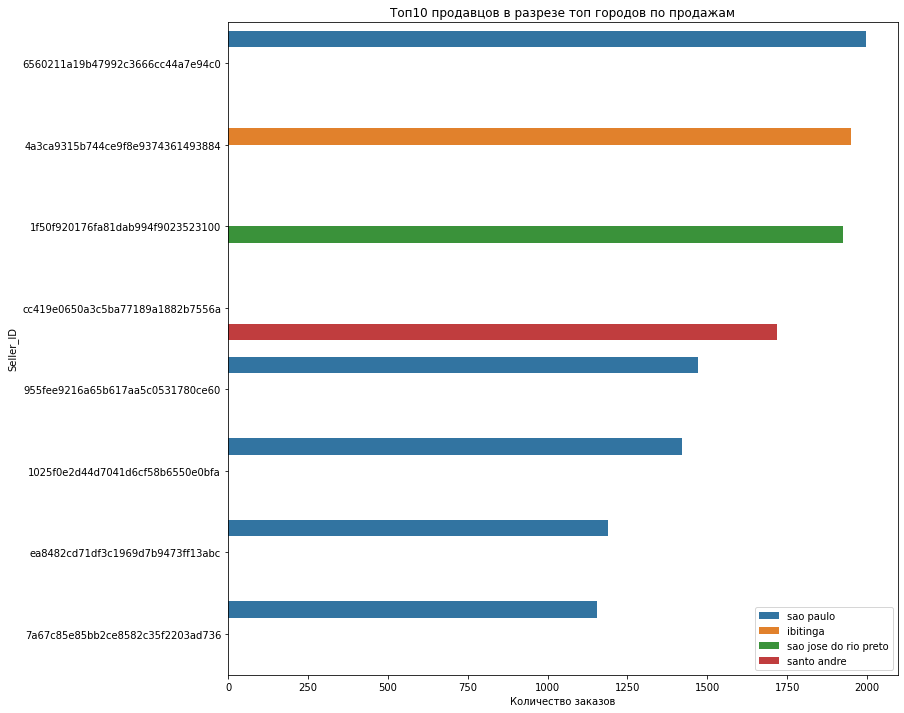

In [58]:
plt.subplots(figsize=(12, 12))
sns.barplot(y='seller_id', x='num_orders', hue='seller_city', 
            data=best_cities_and_cellers)
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Количество заказов')
plt.title('Топ10 продавцов в разрезе топ городов по продажам')
plt.legend(loc=4)
plt.show()

In [59]:
# orders_filtering = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id']

In [60]:
# orders_filtering

In [61]:
# my_filter = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id'].str.startswith('ff')

In [62]:
# orders_filtering[my_filter].count()

In [63]:
# orders_count[orders_count['seller_id'].str.startswith('ff')]

In [64]:
# orders_count[orders_count['seller_id'].str.startswith('ff')].count()